In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,log_loss,mean_absolute_error,root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df =pd.read_excel("D:\\Réseaux de neurones\\PrédictionEfficacitéÉnergétiqueBâtiments\\energy+efficiency\\ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8:10]


Y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(768, 8)

In [70]:
def splitData(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test 

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_test.head()

,Y1,Y2
668,16.47,16.90
324,13.17,16.39
624,32.82,32.78
690,41.32,46.23
473,16.69,19.76


In [41]:
def bp_model(X_train, y_train,X_test,hidden_layer=(50, 30,20), acti='relu' ,sol='adam',max_it=5000,random_st=42):
    bp = MLPRegressor(hidden_layer_sizes=hidden_layer,  # architecture du réseau
                        activation=acti,
                        solver=sol,
                        max_iter=max_it,
                        random_state=random_st)
    bp.fit(X_train, y_train)
    y_pred = bp.predict(X_test)
    #visualistionMse(bp.loss_curve_)
    
    return y_pred

In [42]:
y_predM1 = bp_model(X_train, y_train,X_test,hidden_layer=(13, 10,9), acti='relu' ,sol='adam',max_it=1000,random_st=42)
#print("y_pred :",y_pred.shape)
#y_pred[:,0]

In [32]:
 Pmetrics(y_test,y_pred)

MSE1: 8.886390430948103
R²1: 0.9147444591161651
--------
MSE2: 10.277764030475973
R²2: 0.8890775898450248


In [43]:
y_predM2= bp_model(X_train, y_train,X_test,hidden_layer=(100,), acti='relu' ,sol='adam',max_it=1000,random_st=42)

In [44]:
def devideY(y_test,y_pred):
    y1_pred=y_pred[:,0]
    y2_pred=y_pred[:,1]
    y1_test=y_test.iloc[:, 0]
    y2_test=y_test.iloc[:, 1]
    return { "y1_pred":y1_pred,"y2_pred":y2_pred,"y1_test":y1_test,"y2_test":y2_test}

In [45]:
para1=devideY(y_test,y_predM1 )
para2=devideY(y_test,y_predM2 )

In [31]:
#y1_pred = bp.predict(X_test)
#y2_pred = bp2.predict(X_test)
def Pmetrics(y_test,y_pred):
    
    y1_pred=y_pred[:,0]
    y2_pred=y_pred[:,1]
    y1_test=y_test.iloc[:, 0]
    y2_test=y_test.iloc[:, 1]
    mse1 = mean_squared_error(y1_test, y1_pred)
    # coefficient de détermination 
    r21 = r2_score(y1_test, y1_pred)


    mse2 = mean_squared_error(y2_test, y2_pred)
    # coefficient de détermination 
    r22 = r2_score(y2_test, y2_pred)

    print("MSE1:", mse1)
    print("R²1:", r21)
    print("--------")
    print("MSE2:", mse2)
    print("R²2:", r22)

In [48]:
def visualisationYpEtYT(y1_test,y2_test,y1_pred,y2_pred,string):
    
    valeurs = np.linspace(0, 20, 154)
    plt.figure(figsize=(30, 6))
    plt.subplot(141)
    #plt.scatter(y1_test, y1_pred)
    plt.xlabel("X")
    plt.ylabel("Target")
    plt.title(f"Prédictions vs Réalité (Heating Load) {string}")
    plt.plot(valeurs, y1_test, color='blue',label="Valeurs Réelles (Y1")
    plt.plot(valeurs, y1_pred ,color='red',label="Prédictions (Y1)")
    plt.legend()
    plt.subplot(142)
    #plt.scatter(y2_test, y2_pred)
    plt.xlabel("X")
    plt.ylabel("Target")
    #plt.title("Prédictions vs Réalité ( Cooling Load )")
    plt.plot(valeurs, y2_test, color='blue',label="Valeurs Réelles (Y2)")
    plt.plot(valeurs, y2_pred, color='red',label="Prédictions (Y2)")
    plt.legend()
    plt.show()

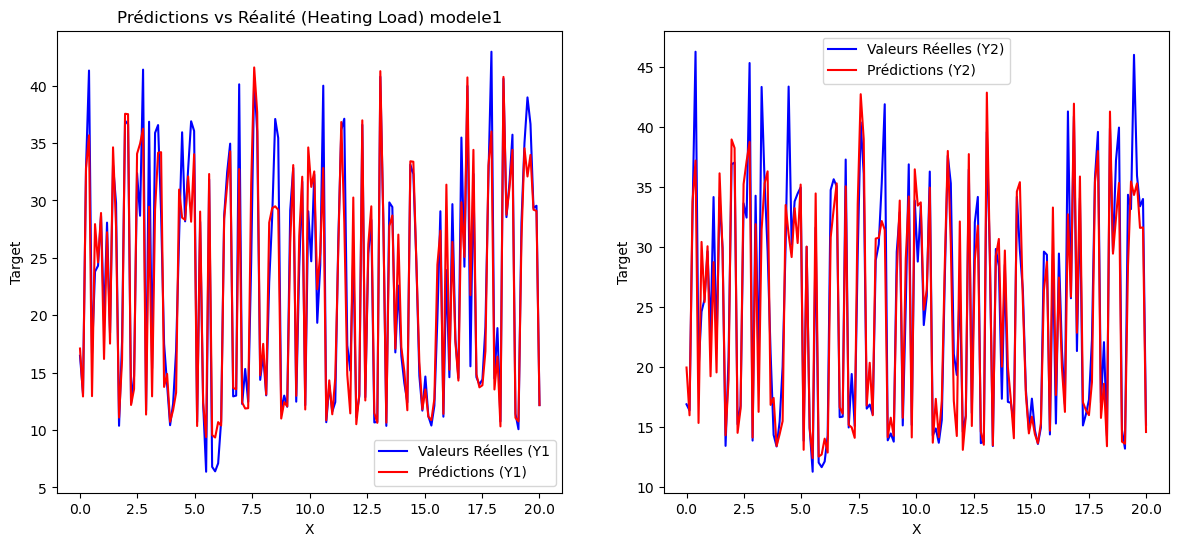

In [49]:
visualisationYpEtYT(para1["y1_test"],para1["y2_test"],para1["y1_pred"],para1["y2_pred"],"modele1")

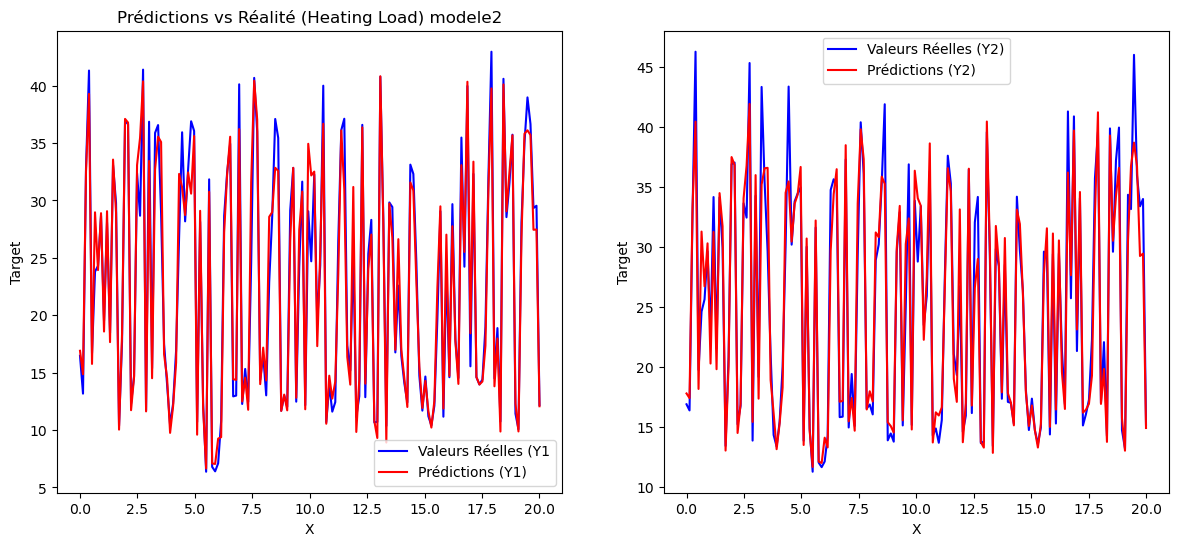

In [50]:
visualisationYpEtYT(para2["y1_test"],para2["y2_test"],para2["y1_pred"],para2["y2_pred"],"modele2")

In [24]:
def visualistionMse(mse):
    plt.plot(mse)
    plt.title("Évolution de la perte (MSE) sur le jeu d'entraînement")
    plt.xlabel("Itération")
    plt.ylabel("Loss (MSE)")
    plt.grid(True)
    plt.show()